<a href="https://colab.research.google.com/github/harksodje/Firefly-ALgorithm/blob/main/FireFly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing necessary libaries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#CONSTANTS
lb = [-5,-10,-15] #lower boundaries
ub = [5,10,15] #upper boundaries
d = 3   # number variables
pol_size = 20 #number of population
num_iter = 100 #number of iteration
alpha = 1 # randomness 
gamma = 0.01 #absorption coefficient
beta0 = 1 #initial better
theta = 0.97 #alha value ranges between 0.95 and 0.97

In [9]:
# creating random number for the memory
matrix_ = np.zeros([pol_size,d]) 
print (f'Matrix memory: {matrix_}')
for i in range(pol_size):
    for k in range(d):
         matrix_[i,k] = lb[k] + np.random.randn()*(ub[k]-lb[k])
print ( f'Random Matrix: {matrix_}')

Matrix memory: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Random Matrix: [[-15.85095149  -5.10993931 -38.29356337]
 [-16.56163277   5.7078408   26.42383903]
 [  1.77165957  -9.69985952 -10.12470424]
 [  0.28979589  14.58051093  -8.43968295]
 [  1.19884703 -21.41706256 -61.36100651]
 [  4.6090384  -21.68188602  -7.80527195]
 [ -6.24685749 -22.80794858 -19.91596533]
 [-16.36960064 -14.80949929 -41.40711192]
 [  9.77183473 -14.89290936 -49.38735285]
 [ -5.34548057 -40.37845487 -17.61215482]
 [ -5.95014841 -27.86785842 -39.55608387]
 [-20.05857653  22.64185309 -52.52274382]
 [ -9.50727955 -30.46173995  -9.44708554]
 [ -9.44357693  -2.40001438 -10.22575759]
 [  1.40079406 -18.77331421  52.40039274]
 [ -4.85314056 -47.60086607   9.1183272 ]
 [  3.76028532  16.27464008 -49.1314189 ]
 [  8.20038496 

In [10]:
# objective function 
def obj_func (x):
    x_1 = x[0] # first variable
    x_2 = x[1]  # second variable
    x_3 = x[2]  # third varianle
    return np.min(x_1 + x_2 + x_3)

$$
            X_{i}^{t+1} = X_{i}^{t}  + β_{0} e ^{-γr_{i,j}^2} + α_{t} ε_{t}^{t}
$$

In [12]:
#optimization process

best_score = []
for iter in range (num_iter):
    # iteration looping
    
    scale_btw_ub_lb = np.array(ub) - np.array(lb) # define stigma
    for i in range(pol_size):
        for j in range (pol_size):
            
            
            
            xi = matrix_[i,:] #main fly
            xj = matrix_[j,:] # corresponding flies
            
            # checking the optimization condition 
            if obj_func(xi) > obj_func(xj):
                matrix_[i,:] = matrix_[i,:]

            else:
                # r in square
                r = np.square(matrix_[i,:] - matrix_[i,:])

                beta = beta0 * np.exp(-gamma *r) #attractiveness
                
                steps = alpha * (np.random.randn(d)-0.5) *scale_btw_ub_lb
                
                xnew = xi + beta *(xi - xj) + steps #new flies created
                
                #checking the boundaries wwith respect to inital boundaries
                for ra in range(len(xnew)):
                    #condition for the first element
                    if xnew[0] > ub[0] or xnew[0] < lb[0]:
                        xnew[0] = np.clip(xnew[0], lb[0],ub[0])
                        
                    #condition for the second element
                    elif xnew[1] > ub[1] and xnew[1] < lb[1]:
                        xnew[1] = np.clip(xnew[1], lb[1],ub[1])
                        
                    #conditon for the third element
                    elif xnew[2] > ub[2] and xnew[2] < lb[2]:
                        xnew[2] = np.clip(xnew[2], lb[2],ub[2]) 
                    
                    
            fnew = obj_func(xnew) #new function
            f = obj_func(matrix_[i,:]) #old function 
            if fnew < f:
                matrix_[i,:] = xnew
                
    best_score.append(obj_func(matrix_))
    print (f'Number of Iteration: {iter}, Best cost: {obj_func(matrix_)}, Components: {xnew}')
            

Number of Iteration: 0, Best cost: -6.42038655564792e+18, Components: [-5.00000000e+000 -2.84546662e+115 -6.33660408e+115]
Number of Iteration: 1, Best cost: -2.568144825522081e+19, Components: [-5.00000000e+000 -1.49184258e+121 -3.32220231e+121]
Number of Iteration: 2, Best cost: -1.0272559708656196e+20, Components: [ 3.58059894e+000 -7.82154789e+126 -1.74178998e+127]
Number of Iteration: 3, Best cost: -4.109019964780256e+20, Components: [-4.40127195e+000 -4.10074272e+132 -9.13199365e+132]
Number of Iteration: 4, Best cost: -1.6436072021760787e+21, Components: [-5.00000000e+000 -2.14996994e+138 -4.78779412e+138]
Number of Iteration: 5, Best cost: -6.574427241232687e+21, Components: [-2.79148468e-001 -1.12720338e+144 -2.51018285e+144]
Number of Iteration: 6, Best cost: -2.6297705829987915e+22, Components: [ 5.00000000e+000 -5.90979185e+149 -1.31605871e+150]
Number of Iteration: 7, Best cost: -1.0519081705006643e+23, Components: [ 5.00000000e+000 -3.09843291e+155 -6.89993777e+155]
Numbe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in add


Number of Iteration: 35, Best cost: -7.57979673971881e+39, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 36, Best cost: -3.0319186958875234e+40, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 37, Best cost: -1.2127674783550093e+41, Components: [ 5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 38, Best cost: -4.851069913420037e+41, Components: [-1.68894663e-001 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 39, Best cost: -1.940427965368015e+42, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 40, Best cost: -7.76171186147206e+42, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 41, Best cost: -3.104684744588824e+43, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]
Number of Iteration: 42, Best cost: -1.2418738978355296e+44, Components: [-5.00000000e+000 -6.49112385e+307 -1.44551623e+308]

In [20]:
print('Optimize matrix')
print(matrix_)

Optimize matrix
[[ 2.10320053e-001 -2.09783624e+007 -4.67160992e+007]
 [-5.00000000e+000 -6.97085567e+042 -1.55234829e+043]
 [ 1.05615672e+000 -1.15822765e+078 -2.57927118e+078]
 [-5.00000000e+000 -2.88664631e+113 -6.42830763e+113]
 [ 5.00000000e+000 -8.39345565e+148 -1.86914881e+149]
 [-5.00000000e+000 -2.61487804e+184 -5.82310359e+184]
 [-5.00000000e+000 -8.41787719e+219 -1.87458727e+220]
 [ 2.83514238e+000 -2.75361122e+255 -6.13205018e+255]
 [ 4.65268753e+000 -9.07895468e+290 -2.02180342e+291]
 [ 5.00000000e+000 -6.51652122e+307 -1.45117201e+308]
 [-5.00000000e+000 -6.50379360e+307 -1.44833767e+308]
 [-5.00000000e+000 -6.49744221e+307 -1.44692328e+308]
 [ 3.85642566e+000 -6.49426962e+307 -1.44621677e+308]
 [-5.00000000e+000 -6.49268410e+307 -1.44586369e+308]
 [-5.00000000e+000 -6.49189153e+307 -1.44568719e+308]
 [-5.00000000e+000 -6.49149530e+307 -1.44559895e+308]
 [ 4.51272887e-001 -6.49129719e+307 -1.44555484e+308]
 [ 3.79357698e+000 -6.49119814e+307 -1.44553278e+308]
 [-5.0000000

Text(0, 0.5, 'Best Score')

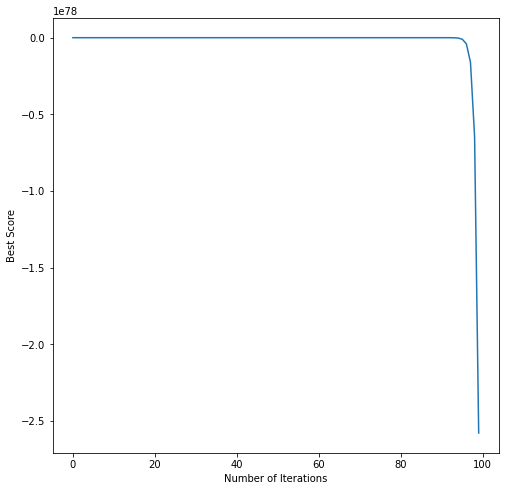

In [21]:
#sns.lineplot(x = best_score, y = range(len(best_score)))
plt.figure(figsize=[8,8])
plt.plot(range(len(best_score)),best_score)
plt.xlabel('Number of Iterations')
plt.ylabel('Best Score')

In [ ]:
len(best_score)

1